In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import cv2

print(cv2.__version__)
print(tf.__version__)

4.2.0
2.2.0


In [4]:
dataset = pd.read_csv("./labels.csv")
dataset.head()

,Filename,Label,Species
0,20160928-140314-0.jpg,0,Chinee apple
1,20160928-140337-0.jpg,0,Chinee apple
2,20160928-140731-0.jpg,0,Chinee apple
3,20160928-140747-0.jpg,0,Chinee apple
4,20160928-141107-0.jpg,0,Chinee apple


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17509 entries, 0 to 17508
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  17509 non-null  object
 1   Label     17509 non-null  int64 
 2   Species   17509 non-null  object
dtypes: int64(1), object(2)
memory usage: 410.5+ KB


# Weed Species in dataset

In [20]:
species = list(set(dataset.Species))
species

['Snake weed',
 'Lantana',
 'Siam weed',
 'Prickly acacia',
 'Negative',
 'Parthenium',
 'Parkinsonia',
 'Rubber vine',
 'Chinee apple']

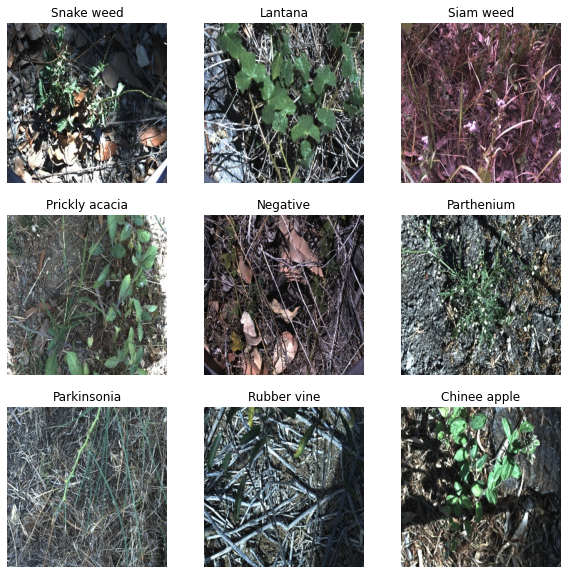

In [30]:
imagesDir = "./images"
speciesSamples = []
for i in species:
    speciesSamples.append(dataset[dataset.Species == i].values[0][0])

matplotlib.rcParams['figure.figsize'] = (10, 10)
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, i*3+j+1)
        img = plt.imread(imagesDir+"/"+speciesSamples[i*3+j])
        plt.axis("off")
        plt.title(species[i*3+j])
        plt.imshow(img)
plt.show()

# Count of images for each species
It's important that the classes have nearly name number of images to avoid bias

In [37]:
speciesCount = {}
for i in species:
    speciesCount[i] = dataset[dataset.Species==i].Species.count()
pd.DataFrame(speciesCount, index = range(1))

,Snake weed,Lantana,Siam weed,Prickly acacia,Negative,Parthenium,Parkinsonia,Rubber vine,Chinee apple
0,1016,1064,1074,1062,9106,1022,1031,1009,1125


Total Species Count = 8439

Each Species = 1000 Images Approx.

Negetive images are almost equal to images of weeds. So dataset is balanced.

# Making CNN

In [44]:
image = plt.imread(imagesDir+"/"+speciesSamples[0])
image.shape

(256, 256, 3)

In [50]:
trainDatagen = tf.keras.preprocessing.image.ImageDataGenerator()
trainGenerator = trainDatagen.flow_from_dataframe(
    dataset, 
    directory=imagesDir, 
    x_col='Filename', 
    y_col='Species',
    target_size=(256, 256), 
    color_mode='rgb',
    class_mode='categorical', 
    batch_size=128, 
    shuffle=True, 
    seed=42
)


Found 17509 validated image filenames belonging to 9 classes.


In [61]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(9))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 8)       584       
_________________________________________________________________
dropout_4 (Dropout)          (None, 125, 125, 8)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 125000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8000064   
_________________________________________________________________
dense_7 (Dense)              (None, 9)                

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(trainGenerator, epochs=1)

KeyboardInterrupt: 